In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
%run "./../1.Load Codes/1.Variables.ipynb"

Loaded variables


# Loading data from previous modules

In [12]:
import pickle

files_data = pickle.load(open(home_path + '/1.Load Codes/files.pickle',"rb"))
acorn_data = files_data['acorn_data']
energy_data = files_data['energy_data']
households_data = files_data['households_data']
weather_data = files_data['weather_data']

# 1. Households

In [13]:
# Tou or Std plot - per Acorn
energy_households = pd.merge(energy_data, households_data, on = 'LCLid')
energy_households_acorn = energy_households.groupby(['Acorn', 'stdorToU']).agg({'energy_sum': ['mean']}).reset_index()

energy_households_acorn_std = energy_households_acorn.loc[energy_households_acorn['stdorToU'] == 'Std']
energy_households_acorn_tou = energy_households_acorn.loc[energy_households_acorn['stdorToU'] == 'ToU']
energy_households_acorn_std.head()

,Acorn,stdorToU,energy_sum
,,,mean
0,ACORN-A,Std,20.097767
2,ACORN-B,Std,11.313461
4,ACORN-C,Std,12.425987
6,ACORN-D,Std,13.900830
8,ACORN-E,Std,10.687825


In [14]:
# Tou or Std plot - per Acorn group
energy_households_acorn_grp = energy_households.groupby(['Acorn_grouped', 'stdorToU']).agg({'energy_sum': ['mean']}).reset_index()

energy_households_acorn_grp_std = energy_households_acorn_grp.loc[energy_households_acorn_grp['stdorToU'] == 'Std']
energy_households_acorn_grp_tou = energy_households_acorn_grp.loc[energy_households_acorn_grp['stdorToU'] == 'ToU']
energy_households_acorn_grp_std.head()

,Acorn_grouped,stdorToU,energy_sum
,,,mean
0,ACORN-U,Std,12.477433
2,Adversity,Std,8.617370
4,Affluent,Std,11.825327
6,Comfortable,Std,10.261093


<ipython-input-15-661c578a9987>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  a[0].set_xticklabels([chr(i) for i in range(ord('A'),ord('Z'))])


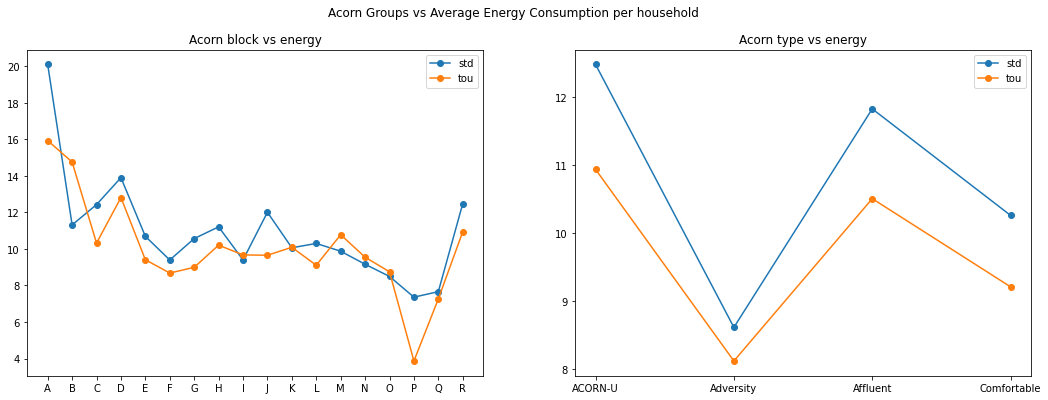

In [15]:
f, a = plt.subplots(1, 2, figsize=(18, 6), num = "Acorn Groups vs Average Energy Consumption per household")
f.suptitle("Acorn Groups vs Average Energy Consumption per household")
a[0].plot(energy_households_acorn_std['Acorn'], energy_households_acorn_std['energy_sum'], '-o', label="std");
a[0].plot(energy_households_acorn_tou['Acorn'], energy_households_acorn_tou['energy_sum'], '-o', label="tou");
a[0].set_xticklabels([chr(i) for i in range(ord('A'),ord('Z'))])
a[0].set_title('Acorn block vs energy')
a[1].plot(energy_households_acorn_grp_std['Acorn_grouped'], energy_households_acorn_grp_std['energy_sum'], '-o', label="std");
a[1].plot(energy_households_acorn_grp_tou['Acorn_grouped'], energy_households_acorn_grp_tou['energy_sum'], '-o', label="tou");
a[1].set_title('Acorn type vs energy')
a[0].legend()
a[1].legend()   
plt.show()

Observations:
1. Std energy type use is generally higher than ToU across different acorn groups

# 2. Energy

In [16]:
energy_data.day = pd.to_datetime(energy_data.day,format='%Y-%m-%d').dt.date
energy_data_day = energy_data.groupby('day').agg({'energy_sum': ['mean', 'count']}).reset_index()
energy_data_day['day'] = pd.to_datetime(energy_data_day['day'])

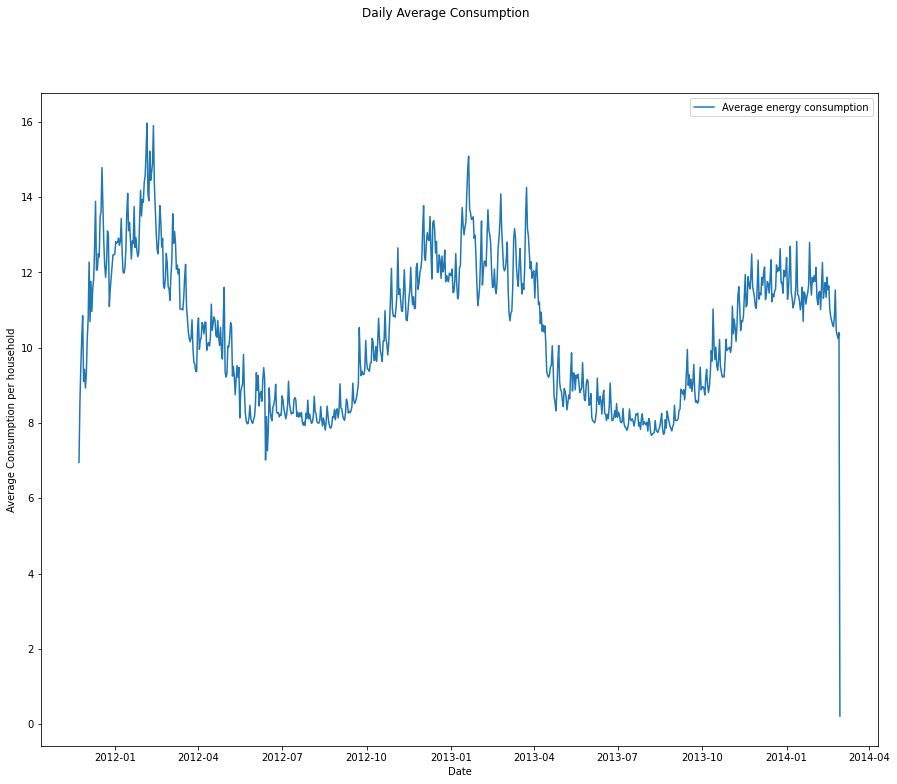

In [18]:
f = plt.figure("Daily Average Consumption", figsize=(15, 12))
f.suptitle("Daily Average Consumption")

a = plt.axes()
a.set_xlabel('Date') 
a.set_ylabel('Average Consumption per household') 

a.plot(energy_data_day['day'], energy_data_day['energy_sum']['mean'], '-', label='Average energy consumption');
a.legend()
plt.show()

Observations:
1. The general trend is that the energy consumption is higher between the months of Januray to April while it gradually decreases till October.
2. The daily average consumption is erratic and the graph is difficult to understand.
3. Due to point 2 above, we aim to smoothen the graph by using different rolling averages instead of the daily average of energy consumption.

In [31]:
# energy consumption throughout a day

# Moving average Energy consumption

In [19]:
energy_data_day[ '3day_rolling_avg' ] = energy_data_day['energy_sum']['mean'].rolling( 3).mean()
energy_data_day[ '7day_rolling_avg' ] = energy_data_day['energy_sum']['mean'].rolling( 7).mean()
energy_data_day[ '15day_rolling_avg' ] = energy_data_day['energy_sum']['mean'].rolling( 15).mean()

# viewing the dataset
energy_data_day.head(10)

day energy_sum       3day_rolling_avg 7day_rolling_avg  \
                   mean count                                     
0 2011-11-23   6.952692    13              NaN              NaN   
1 2011-11-24   8.536480    25              NaN              NaN   
2 2011-11-25   9.499781    32         8.329651              NaN   
3 2011-11-26  10.267707    41         9.434656              NaN   
4 2011-11-27  10.850805    41        10.206098              NaN   
5 2011-11-28   9.103382    55        10.073965              NaN   
6 2011-11-29   9.424468    62         9.792885         9.233616   
7 2011-11-30   8.931027    75         9.152959         9.516236   
8 2011-12-01   9.329110    91         9.228201         9.629469   
9 2011-12-02  10.248394    99         9.502844         9.736413   

  15day_rolling_avg  
                     
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5               NaN  
6               NaN  
7               NaN  
8               NaN  
9               NaN

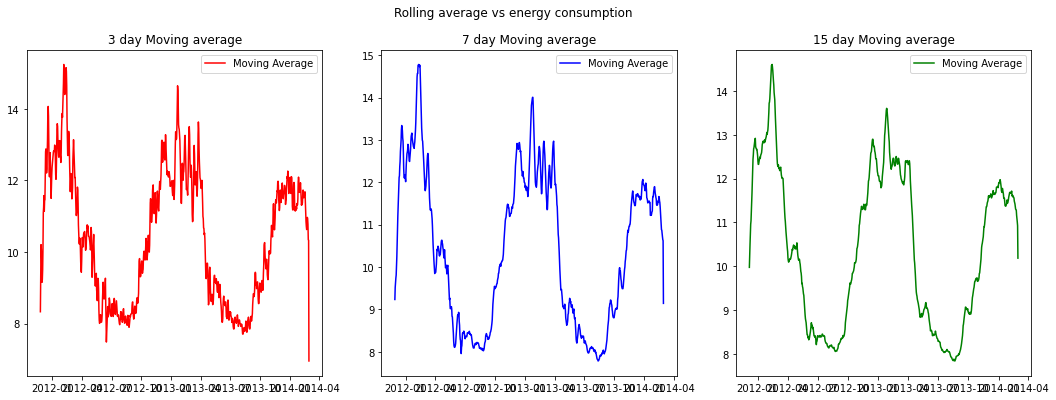

In [21]:
f, a = plt.subplots(1, 3, figsize=(18, 6), num = "Rolling average vs energy consumption")
f.suptitle("Rolling average vs energy consumption")
avg_periods = [3, 7, 15]
colors = ['r', 'b', 'g']

for i in range(3):
    col = str(avg_periods[i]) + 'day_rolling_avg'
    a[i].plot(energy_data_day['day'], energy_data_day[col], '-' + colors[i],label='Moving Average');
    a[i].set_title(str(avg_periods[i]) + ' day Moving average')
    a[i].legend()
plt.show()

# 3. Weather

In [22]:
# selecting numeric variables
weather_data_icon = weather_data[['day','icon']]
weather_data_icon = weather_data_icon.dropna()
weather_data_icon = weather_data_icon.groupby('icon').agg({'day': ['count']}).reset_index()

Text(0, 0.5, 'Number of days')

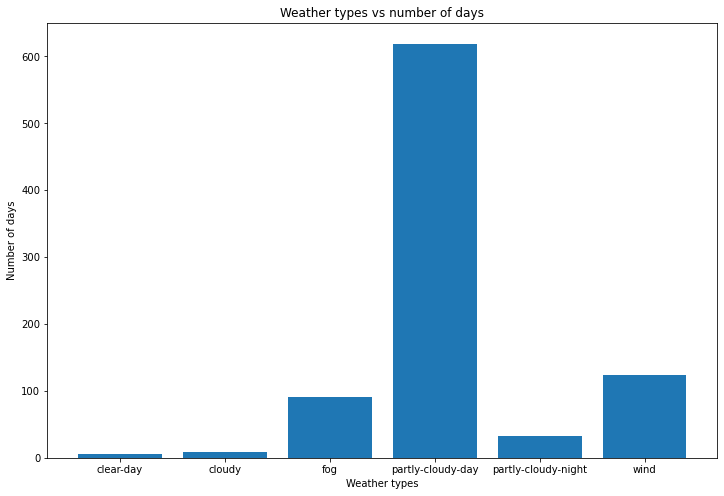

In [23]:
f = plt.figure("Weather types vs number of days", figsize=(12, 8))
a = plt.axes()

a.bar(weather_data_icon['icon'], weather_data_icon['day']['count']);
plt.title("Weather types vs number of days")
plt.xlabel('Weather types') 
plt.ylabel('Number of days')

# Combining datasets

In [24]:
# selecting numeric variables
weather_data = weather_data[['day','temperatureMax','temperatureMin', 
                             'apparentTemperatureMax','apparentTemperatureMin',
                             'visibility', 'windBearing', 'pressure','cloudCover', 
                             'windSpeed', 'humidity','moonPhase', 'dewPoint']]

In [25]:
houses = energy_data.groupby('day')[['LCLid']].nunique()
energy_data1 = energy_data.groupby('day')['energy_mean'].agg('mean')
weather_energy = pd.merge(pd.merge(energy_data1, houses, on = 'day'), weather_data, on='day')
weather_energy.head(2)

,day,energy_mean,LCLid,temperatureMax,temperatureMin,apparentTemperatureMax,apparentTemperatureMin,visibility,windBearing,pressure,cloudCover,windSpeed,humidity,moonPhase,dewPoint
0,2011-11-23,0.281091,13,10.36,3.81,10.36,2.18,8.06,229,1027.12,0.36,2.04,0.93,0.94,6.29
1,2011-11-24,0.234207,25,12.93,8.56,12.93,7.01,10.64,204,1027.22,0.41,4.04,0.89,0.97,8.56


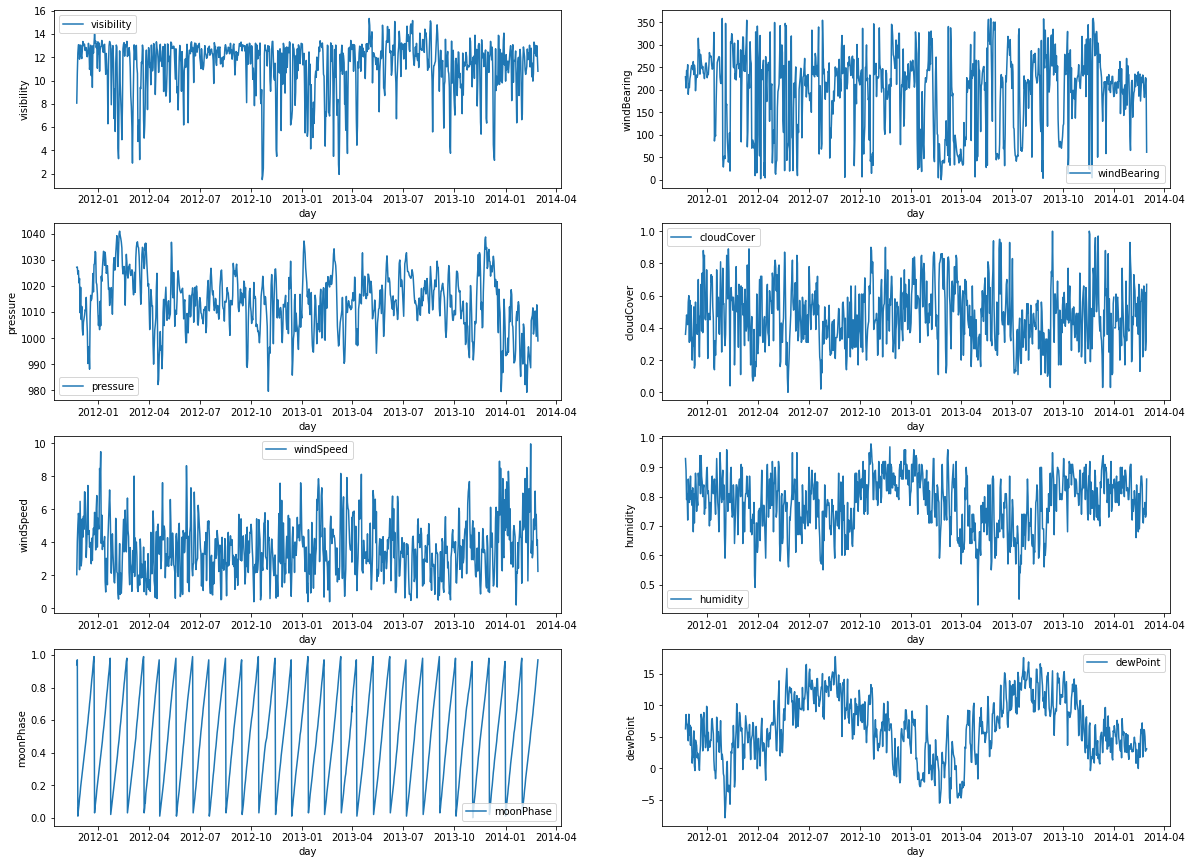

In [26]:
weather_feature = weather_data.columns.drop(['day','temperatureMax','temperatureMin', 
                             'apparentTemperatureMax','apparentTemperatureMin'])

fig,ax = plt.subplots(4,2,figsize = (20,15))
axs = ax.ravel()

for i, feature in enumerate(weather_feature):
    weather_energy.plot('day', feature, ax=axs[i])
    axs[i].set_ylabel(feature)


In [ ]:
Observation:
    1. The plot for Moonphase shows result in binary, which is either 1 or 0. 
    It is difficult to predict energy consumption with binary values, which makes this weather feature not useful.
    
    
Important Features:
    
    1. The plot for visibilty changes daily from higher values in morning to lower values in the evening.
    Therefore to predict energy consumption using this plot we will need to check for energy consumption during different times of the day.
    2. The plot for Humidity shows variation in values which seasonal as well as daily. 
    Which makes it an important feature to predict energy consumption.
    
    

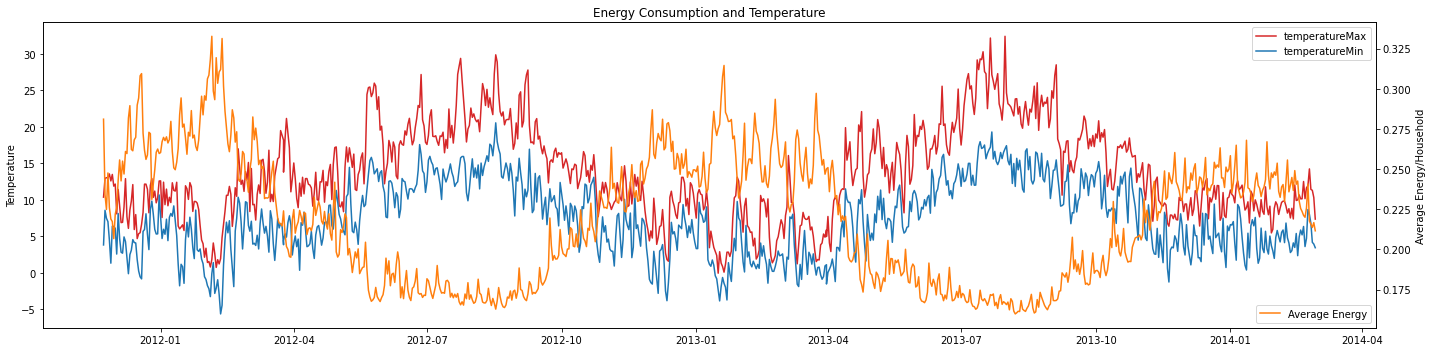

In [30]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.temperatureMax, color = 'tab:red', label="temperatureMax")
ax1.plot(weather_energy.day, weather_energy.temperatureMin, color = 'tab:blue', label="temperatureMin")

ax1.set_ylabel('Temperature')

ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_mean,color = 'tab:orange', label="Average Energy")
ax2.set_ylabel('Average Energy/Household')

plt.title('Energy Consumption and Temperature')
fig.tight_layout()

ax1.legend(loc="upper right")
ax2.legend(loc="lower right")

In [ ]:
# energy consumption throughout a day
# energy plots must be above households plot
# temp slpot should be above other weather plots
# fix temp plots and fix colors for weather plots
# add observations for plots
# parameters for energy - acorn, temp, std/tou, visibility, Humidity, windspeed, day,
#find code for Linear regression and bagging/boosting

